In [1]:
# importing libraries
import pandas as pd                  
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns                 
from os import listdir 
import statsmodels.formula.api as smf               
from sklearn.model_selection import train_test_split 
import sklearn.linear_model 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)


# specifying file name
file = './Grocery_Getters.xlsx'


# reading the file into Python
grocery_df = pd.read_excel(io = file)


# outputting the first 5 rows of the dataset
grocery_df.head(n=5)

,Name,Email,First_Name,Family_Name,REVENUE,Total_Products_Ordered,Product_Categories_Purchased,Total_Brands_Purchased,Customer_Service_Inqueries,Total_Products_Returned,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Time_Per_Visit,Avg_Clicks_Per_Visit,Avg_Product_Rating,Total_Product_Interactions
0,Anguy,anguy@boeing.com,Anguy,Anguy,5194.875,7481,144,10,19,2,6,2,0,0,168.9,47.0,2.368421,5
1,Leo Blackbar,leo.blackbar@pg.com,Leo,Blackbar,5355.000,3492,62,43,18,3,6,1,0,0,238.5,31.0,2.631579,275
2,Wat (Barleycorn),wat.(barleycorn)@live.com,Wat,NaN,2940.000,3588,218,10,13,1,5,2,8,0,143.0,53.0,2.894737,16
3,Hendry Bracken,hendry.bracken@exxon.com,Hendry,Bracken,7087.500,1500,117,12,13,0,6,2,0,8,169.4,39.0,2.631579,302
4,Aenys I Targaryen,aenys.i.targaryen@passport.com,Aenys,I Targaryen,6562.500,6358,19,301,13,1,5,1,0,9,187.4,48.0,2.631579,310


In [2]:
# calling info 
grocery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1946 non-null   object 
 1   Email                         1946 non-null   object 
 2   First_Name                    1946 non-null   object 
 3   Family_Name                   1900 non-null   object 
 4   REVENUE                       1946 non-null   float64
 5   Total_Products_Ordered        1946 non-null   int64  
 6   Product_Categories_Purchased  1946 non-null   int64  
 7   Total_Brands_Purchased        1946 non-null   int64  
 8   Customer_Service_Inqueries    1946 non-null   int64  
 9   Total_Products_Returned       1946 non-null   int64  
 10  Web_Logins                    1946 non-null   int64  
 11  App_Logins                    1946 non-null   int64  
 12  Total_Weeks_Premium           1946 non-null   int64  
 13  Lat

In [3]:
# calling descriptive statistics on dataset
grocery_df.describe().round(decimals=3)

,REVENUE,Total_Products_Ordered,Product_Categories_Purchased,Total_Brands_Purchased,Customer_Service_Inqueries,Total_Products_Returned,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Time_Per_Visit,Avg_Clicks_Per_Visit,Avg_Product_Rating,Total_Product_Interactions
count,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000
mean,2107.293,2038.927,127.989,23.746,4.905,1.571,5.516,1.476,11.330,2.053,150.557,99.605,3.555,113.152
std,1138.291,1557.024,136.006,97.489,2.502,1.611,0.581,0.528,13.573,3.789,49.447,62.342,0.614,177.152
min,131.000,160.000,1.000,1.000,1.000,0.000,4.000,0.000,0.000,0.000,33.400,10.330,1.316,1.000
25%,1350.000,942.250,39.000,4.000,3.000,0.000,5.000,1.000,1.000,0.000,114.400,72.000,3.158,10.000
50%,1740.000,1686.000,87.500,8.000,5.000,1.000,6.000,1.000,7.000,0.000,145.600,94.160,3.421,17.000
75%,2670.000,2594.000,172.000,16.000,7.000,2.000,6.000,2.000,13.000,3.000,173.775,117.288,3.947,174.000
max,8793.750,14958.000,1611.000,3298.000,19.000,13.000,7.000,3.000,52.000,18.000,564.200,1645.600,5.000,1600.000


In [4]:
#checking for missing values
grocery_df.isnull().mean().round(3)

Name                            0.000
Email                           0.000
First_Name                      0.000
Family_Name                     0.024
REVENUE                         0.000
Total_Products_Ordered          0.000
Product_Categories_Purchased    0.000
Total_Brands_Purchased          0.000
Customer_Service_Inqueries      0.000
Total_Products_Returned         0.000
Web_Logins                      0.000
App_Logins                      0.000
Total_Weeks_Premium             0.000
Late_Deliveries                 0.000
Avg_Time_Per_Visit              0.000
Avg_Clicks_Per_Visit            0.000
Avg_Product_Rating              0.000
Total_Product_Interactions      0.000
dtype: float64

In [5]:
# dropping non-numeric attributes
grocery_df = grocery_df.drop(columns = ['Name', 'Email', 'First_Name', 'Family_Name'])

In [6]:
# checking number of zeroes for the columns that 
# have a min value of 0 in the descriptive statistics

returned_zeroes = len(grocery_df['Total_Products_Returned'][grocery_df['Total_Products_Returned'] == 0]) 
app_zeroes      = len(grocery_df['App_Logins'][grocery_df['App_Logins'] == 0])
premium_zeroes  = len(grocery_df['Total_Weeks_Premium'][grocery_df['Total_Weeks_Premium'] == 0])
late_zeroes     = len(grocery_df['Late_Deliveries'][grocery_df['Late_Deliveries'] == 0])


# printing a table of the results
print(f"""
                      No\t\tYes
                     ---------------------
Products Returned   | {returned_zeroes}\t\t{len(grocery_df) - returned_zeroes}
App Logings         | {app_zeroes}\t\t{len(grocery_df) - app_zeroes}
Weeks Premium       | {premium_zeroes}\t\t{len(grocery_df) - premium_zeroes}
Late Deliveries     | {late_zeroes}\t\t{len(grocery_df) - late_zeroes}
""")


                      No		Yes
                     ---------------------
Products Returned   | 572		1374
App Logings         | 16		1930
Weeks Premium       | 468		1478
Late Deliveries     | 1433		513



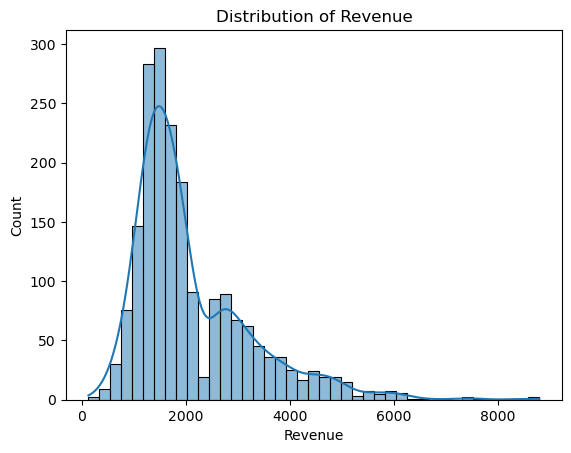

In [7]:
# histogram of revenue
sns.histplot(data  = grocery_df,
             x     = 'REVENUE',
             kde   = True)


# title and axis labels
plt.title(label   = "Distribution of Revenue")
plt.xlabel(xlabel = "Revenue") 
plt.ylabel(ylabel = "Count")


# showing histogram
plt.show()

In [8]:
# log transforming REVENUE and saving it to dataset
grocery_df['log_REVENUE'] = np.log1p(grocery_df['REVENUE'])

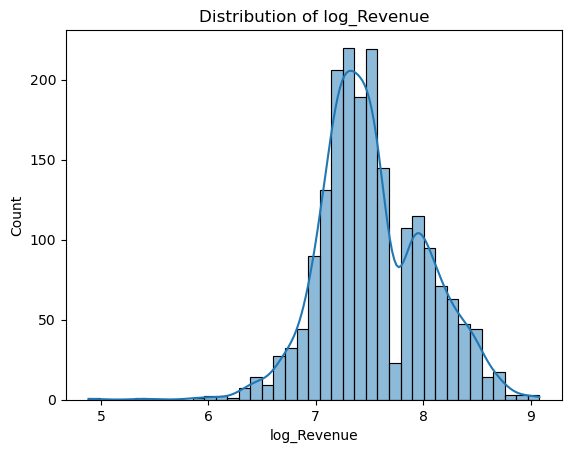

In [9]:
# histogram of revenue
sns.histplot(data  = grocery_df,
             x     = 'log_REVENUE',
             kde   = True)


# title and axis labels
plt.title(label   = "Distribution of log_Revenue")
plt.xlabel(xlabel = "log_Revenue") 
plt.ylabel(ylabel = "Count")


# showing histogram
plt.show()

In [10]:
# instatiating correlation of dataset
grocery_corr = grocery_df.corr(method = 'pearson').round(3)

In [11]:
grocery_corr.loc[ : , ['REVENUE', 'log_REVENUE'] ].round(2).sort_values(by = 'REVENUE',
                                                                        ascending = False)

,REVENUE,log_REVENUE
REVENUE,1.00,0.95
log_REVENUE,0.95,1.00
Total_Products_Ordered,0.72,0.68
Avg_Time_Per_Visit,0.64,0.65
Product_Categories_Purchased,0.50,0.48
Total_Product_Interactions,0.46,0.43
Customer_Service_Inqueries,0.17,0.18
Avg_Clicks_Per_Visit,0.14,0.14
App_Logins,0.07,0.08
Web_Logins,0.02,0.01


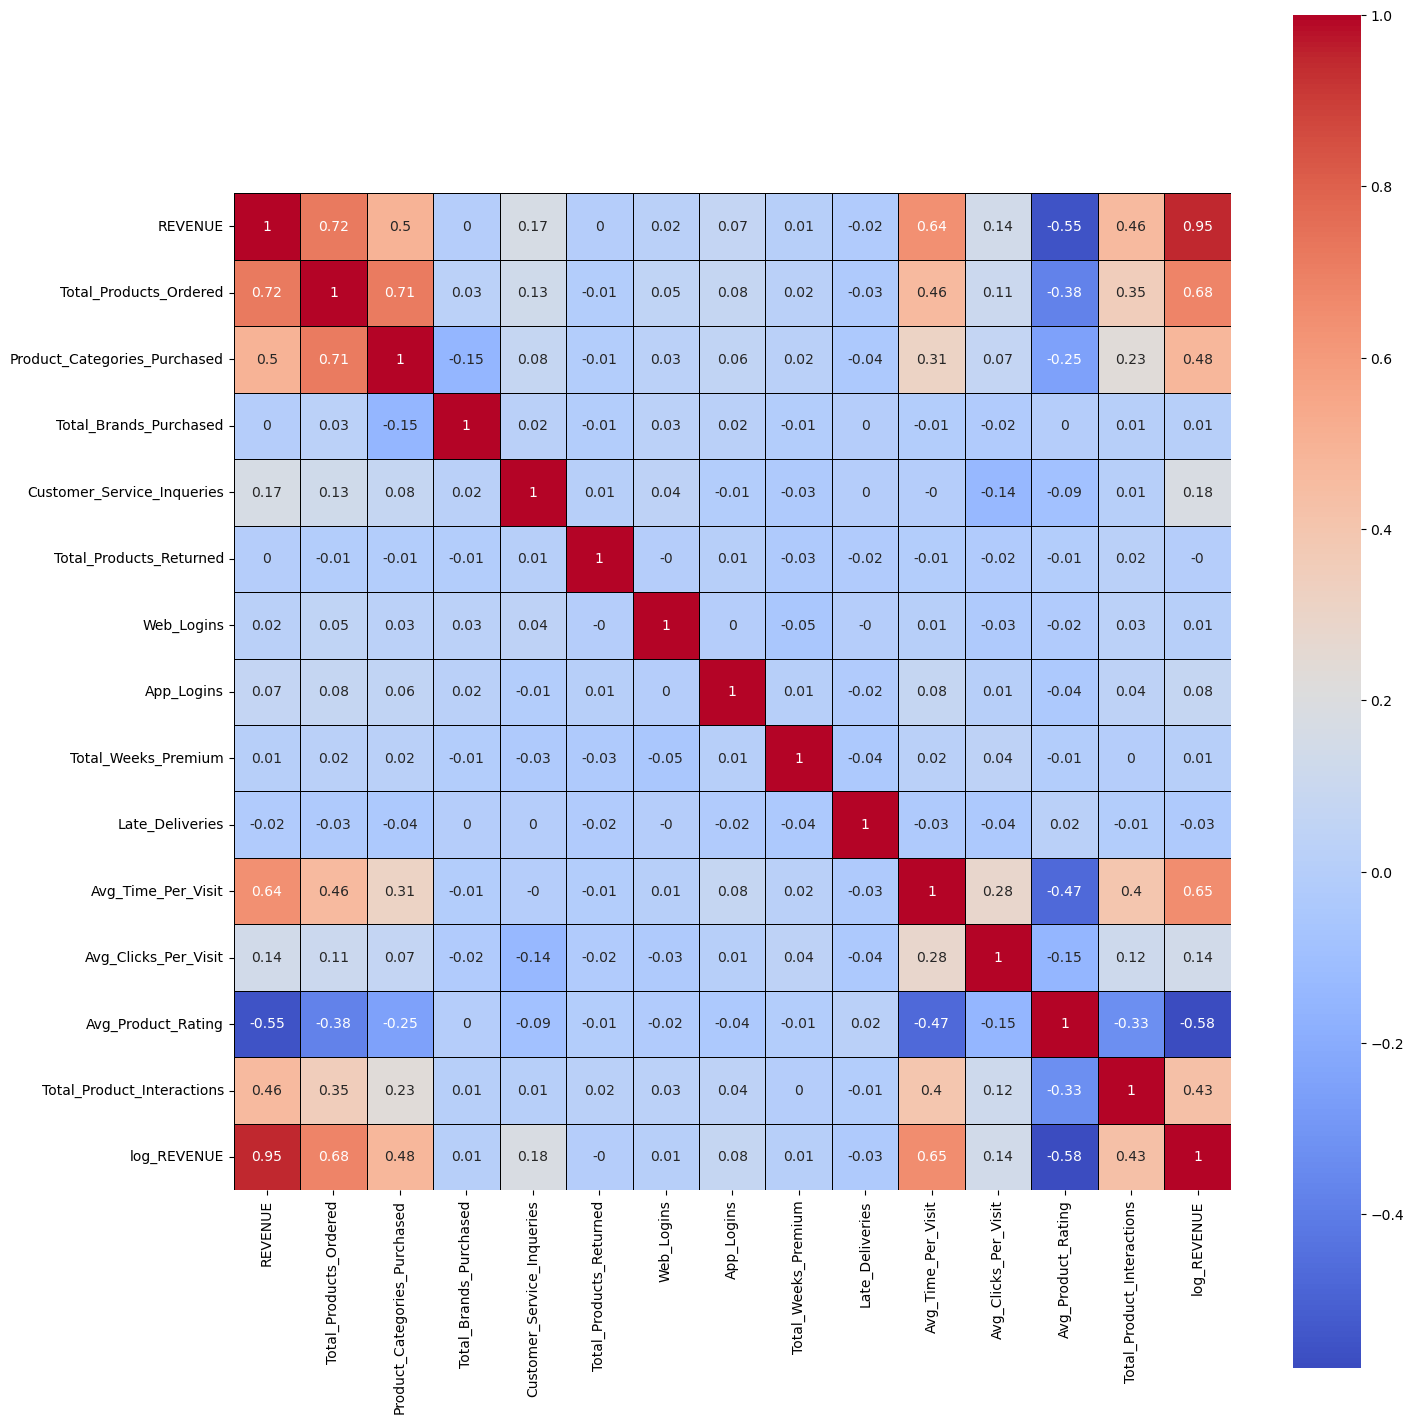

In [12]:
# instantiating a correlation matrix
df_corr = grocery_df.corr().round(2)


# setting figure size
fig, ax = plt.subplots(figsize=(15,15))


# visualizing the correlation matrix
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# layout and rendering
plt.tight_layout()
plt.show()

In [13]:
## BASE MODEL ##

# instantiating model object
lm_best = smf.ols(formula = """REVENUE ~ Total_Products_Ordered +
                                        Avg_Time_Per_Visit +
                                        Total_Product_Interactions + 
                                        Customer_Service_Inqueries +
                                        Avg_Product_Rating 
                                         """,
                             data = grocery_df)

# fit data into model object
results_lm_best = lm_best.fit()

# summary output
print(results_lm_best.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     901.5
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:15:58   Log-Likelihood:                -15287.
No. Observations:                1946   AIC:                         3.059e+04
Df Residuals:                    1940   BIC:                         3.062e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [14]:
#checking skewness of x-features
grocery_df.iloc[:,:].skew(axis = 0).round(decimals = 2)

REVENUE                          1.63
Total_Products_Ordered           1.97
Product_Categories_Purchased     2.85
Total_Brands_Purchased          22.16
Customer_Service_Inqueries       0.37
Total_Products_Returned          1.44
Web_Logins                      -0.04
App_Logins                       0.05
Total_Weeks_Premium              1.54
Late_Deliveries                  1.71
Avg_Time_Per_Visit               1.20
Avg_Clicks_Per_Visit             9.64
Avg_Product_Rating              -0.11
Total_Product_Interactions       2.60
log_REVENUE                      0.19
dtype: float64

In [15]:
# logarithmic transformation of x-features with a skewness greater than 1.00
grocery_df['log_Total_Products_Ordered']       = np.log1p(grocery_df['Total_Products_Ordered'])
grocery_df['log_Product_Categories_Purchased'] = np.log1p(grocery_df['Product_Categories_Purchased'])
grocery_df['log_Total_Brands_Purchased']       = np.log1p(grocery_df['Total_Brands_Purchased'])
grocery_df['log_Total_Products_Returned']      = np.log1p(grocery_df['Total_Products_Returned'])
grocery_df['log_Total_Weeks_Premium']          = np.log1p(grocery_df['Total_Weeks_Premium'])
grocery_df['log_Late_Deliveries']              = np.log1p(grocery_df['Late_Deliveries'])
grocery_df['log_Avg_Time_Per_Visit']           = np.log1p(grocery_df['Avg_Time_Per_Visit'])
grocery_df['log_Avg_Clicks_Per_Visit']         = np.log1p(grocery_df['Avg_Clicks_Per_Visit'])
grocery_df['log_Total_Product_Interactions']   = np.log1p(grocery_df['Total_Product_Interactions'])

In [16]:
grocery_df.loc[:,'log_REVENUE':].skew(axis = 0).round(decimals = 2)

log_REVENUE                         0.19
log_Total_Products_Ordered         -0.21
log_Product_Categories_Purchased   -0.66
log_Total_Brands_Purchased          1.03
log_Total_Products_Returned         0.14
log_Total_Weeks_Premium            -0.18
log_Late_Deliveries                 1.20
log_Avg_Time_Per_Visit             -0.06
log_Avg_Clicks_Per_Visit           -0.45
log_Total_Product_Interactions      0.46
dtype: float64

In [17]:
grocery_corr_new = grocery_df.corr(method = 'pearson').round(3)
grocery_corr_new.loc[ : , 'REVENUE'].round(2).sort_values(ascending = False)

REVENUE                             1.00
log_REVENUE                         0.95
Total_Products_Ordered              0.72
Avg_Time_Per_Visit                  0.64
log_Avg_Time_Per_Visit              0.63
log_Total_Products_Ordered          0.62
Product_Categories_Purchased        0.50
Total_Product_Interactions          0.46
log_Total_Product_Interactions      0.43
log_Product_Categories_Purchased    0.38
Customer_Service_Inqueries          0.17
log_Avg_Clicks_Per_Visit            0.15
Avg_Clicks_Per_Visit                0.14
App_Logins                          0.07
Web_Logins                          0.02
log_Total_Brands_Purchased          0.02
Total_Weeks_Premium                 0.01
log_Total_Products_Returned         0.01
Total_Products_Returned             0.00
Total_Brands_Purchased              0.00
log_Total_Weeks_Premium            -0.01
Late_Deliveries                    -0.02
log_Late_Deliveries                -0.02
Avg_Product_Rating                 -0.55
Name: REVENUE, d

<br>

# Feature Engineering

In [18]:
# binary features for features that have 0 values
grocery_df['has_Premium'] = 0
grocery_df['has_Returned'] = 0
grocery_df['has_Late_Deliveries'] = 0


#for loop with iterroe to go over every row
for index, value in grocery_df.iterrows():

    # Premium
    if grocery_df.loc[index, 'Total_Weeks_Premium'] > 0:
        grocery_df.loc[index, 'has_Premium'] = 1
        
    # Products Returned
    if grocery_df.loc[index, 'Total_Products_Returned'] > 0:
        grocery_df.loc[index, 'has_Returned'] = 1
        
    # Late Deliveries
    if grocery_df.loc[index, 'Late_Deliveries'] > 0:
        grocery_df.loc[index, 'has_Late_Deliveries'] = 1

In [19]:
# "Logins"
grocery_df['Logins'] = (grocery_df['Web_Logins']+
                        grocery_df['App_Logins'])

<br>

In [20]:
## FEATURE 1 ##
# Instantiating feature 'Engagement_Score'
grocery_df['Engagement_Score'] = (grocery_df['log_Avg_Time_Per_Visit'] +
                                  grocery_df['log_Avg_Clicks_Per_Visit'] +
                                  grocery_df['log_Total_Product_Interactions'])

#"Logins" not included because correlation and R-Sqaure is worse

# creating correlations with REVENUE and log_REVENUE
engagement_corr1 = grocery_df.loc[:, 'Engagement_Score'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
engagement_corr2 = grocery_df.loc[:, 'Engagement_Score'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)

# printing result of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{engagement_corr1}
log_Revenue:\t{engagement_corr2}
""")


CORRELATION 
-----------
Revenue:	0.513
log_Revenue:	0.518



In [21]:
# INSTANTIATING OLS with 'Enagement_Score'
lm_engagement_score = smf.ols(formula = """REVENUE ~
                                Engagement_Score""",
                        data = grocery_df)

# telling Python to FIT the data to the blueprint
results_engagement_score = lm_engagement_score.fit()

# printing a summary of the results
print(results_engagement_score.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     694.4
Date:                Sun, 09 Feb 2025   Prob (F-statistic):          4.16e-131
Time:                        00:15:58   Log-Likelihood:                -16158.
No. Observations:                1946   AIC:                         3.232e+04
Df Residuals:                    1944   BIC:                         3.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2068.6351    160.013  

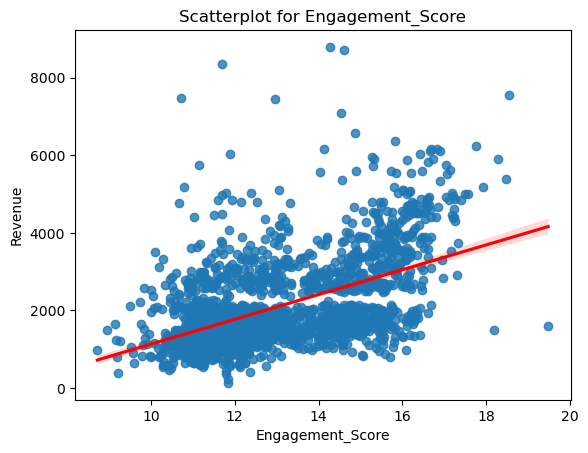

In [22]:
# scatterplot with trendline for "Engagement_Score"
sns.regplot(x    = 'Engagement_Score',
            y    = 'REVENUE' ,
            data = grocery_df,
            line_kws={"color": "red"})


# titles and axis labels
plt.title(label   = 'Scatterplot for Engagement_Score')
plt.xlabel(xlabel = 'Engagement_Score')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

In [23]:
## FEATURE 1 ##
# Creating new column for feature "Norm_Engagement_Score"

# normalizing time, clicks, and interactions to not mix units
scaler = MinMaxScaler()

# Normalize the three features
grocery_df[['Norm_Time', 'Norm_Clicks', 'Norm_Interactions', 'Norm_Products_Ordered']] = \
scaler.fit_transform(grocery_df[['Avg_Time_Per_Visit', 'Avg_Clicks_Per_Visit', 'Total_Product_Interactions',
                                'Total_Products_Ordered']])

# instantiating the new feature
grocery_df['Norm_Engagement_Score'] = (grocery_df['Norm_Time'] +
                                       grocery_df['Norm_Clicks'] +
                                       grocery_df['Norm_Interactions'])
#"Logins" not included because correlation and R-Sqaure is worse

# creating correlations with REVENUE and log_REVENUE
norm_engagement_corr1 = grocery_df.loc[:, 'Norm_Engagement_Score'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
norm_engagement_corr2 = grocery_df.loc[:, 'Norm_Engagement_Score'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)

# printing result of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{norm_engagement_corr1}
log_Revenue:\t{norm_engagement_corr2}
""")


CORRELATION 
-----------
Revenue:	0.636
log_Revenue:	0.618



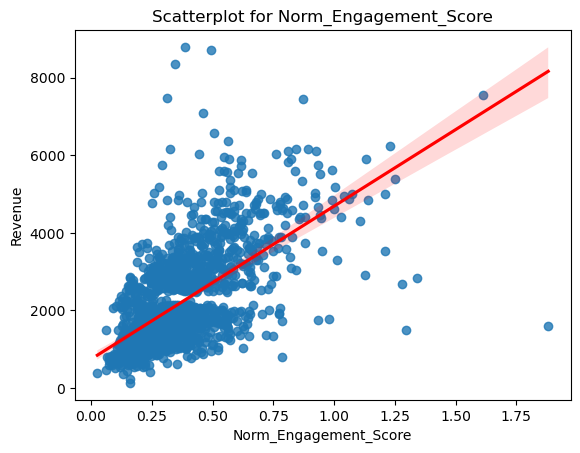

In [24]:
# scatterplot with trendline for "Norm_Engagement_Score"
sns.regplot(x    = 'Norm_Engagement_Score',
            y    = 'REVENUE' ,
            data = grocery_df,
            line_kws={"color": "red"})


# titles and axis labels
plt.title(label   = 'Scatterplot for Norm_Engagement_Score')
plt.xlabel(xlabel = 'Norm_Engagement_Score')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

<br>

In [25]:
## Feature 2 ##
# Instantiating feature 'Purchase_Score'
grocery_df['Purchase_Score'] = (grocery_df['log_Total_Products_Ordered'] *
                               (grocery_df['log_Product_Categories_Purchased'] +
                                grocery_df['log_Total_Brands_Purchased']))


# creating correlation with REVENUE and log_REVENUE
purchase_corr1 = grocery_df.loc[:, 'Purchase_Score'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
purchase_corr2 = grocery_df.loc[:, 'Purchase_Score'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)


# printing results of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{purchase_corr1}
log_Revenue:\t{purchase_corr2}
""")


CORRELATION 
-----------
Revenue:	0.59
log_Revenue:	0.605



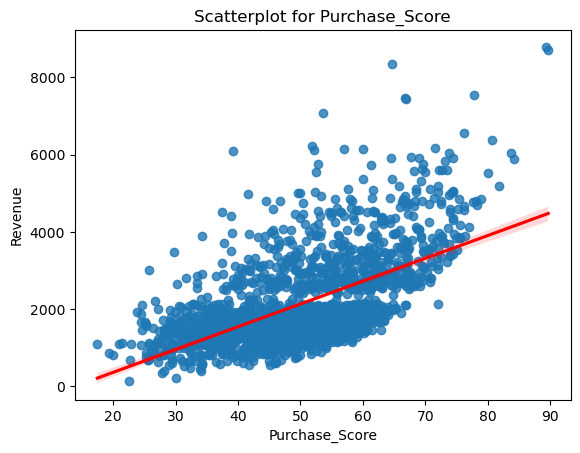

In [26]:
# scatterplot with trendline for "Purchase_Score"
sns.regplot(x    = 'Purchase_Score',
            y    = 'REVENUE' ,
            data = grocery_df,
            line_kws={"color": "red"})


# titles and axis labels
plt.title(label   = 'Scatterplot for Purchase_Score')
plt.xlabel(xlabel = 'Purchase_Score')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

In [105]:
## FEATURE 3 ##
# instantiating new feature 'Cart_Variety_Index'
grocery_df['Cart_Variety_Index'] = grocery_df['log_Product_Categories_Purchased'] / grocery_df['log_Total_Products_Ordered']

# creating correlation with REVENUE and log_REVENUE                                 
cart_variety_corr1 = grocery_df.loc[:, 'Cart_Variety_Index'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
cart_variety_corr2 = grocery_df.loc[:, 'Cart_Variety_Index'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)


# printing results of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{cart_variety_corr1}
log_Revenue:\t{cart_variety_corr2}
""")


CORRELATION 
-----------
Revenue:	0.173
log_Revenue:	0.198



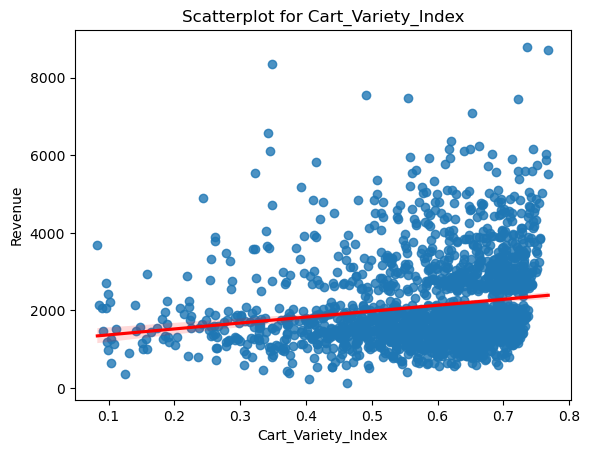

In [106]:
# scatterplot with trendline for "Cart_Variety_Index"
sns.regplot(x    = 'Cart_Variety_Index',
            y    = 'REVENUE' ,
            data = grocery_df,
            line_kws={"color": "red"})


# titles and axis labels
plt.title(label   = 'Scatterplot for Cart_Variety_Index')
plt.xlabel(xlabel = 'Cart_Variety_Index')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

In [29]:
## FEATURE 4 ##
# Instantiating feature 'High_Value_Shopper'
grocery_df['High_Value_Shopper'] = (((grocery_df['log_Total_Products_Ordered'] > 7.4).astype(int) +
                                    (grocery_df['Product_Categories_Purchased'] > 87).astype(int) +
                                    (grocery_df['has_Premium'] == 1) +
                                    (grocery_df['Avg_Product_Rating'] > 3.3).astype(int)) >= 3)

# creating correlation with REVENUE and log_REVENUE                                 
value_shop_corr1 = grocery_df.loc[:, 'High_Value_Shopper'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
value_shop_corr2 = grocery_df.loc[:, 'High_Value_Shopper'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)


# printing results of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{value_shop_corr1}
log_Revenue:\t{value_shop_corr2}
""")


CORRELATION 
-----------
Revenue:	0.218
log_Revenue:	0.264



/opt/homebrew/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


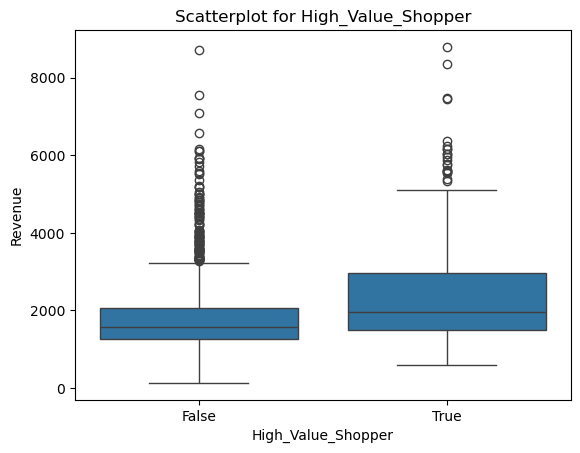

In [30]:
# boxplot for "High Value Shopper"
sns.boxplot(x    = 'High_Value_Shopper',
            y    = 'REVENUE' ,
            data = grocery_df)


# titles and axis labels
plt.title(label   = 'Scatterplot for High_Value_Shopper')
plt.xlabel(xlabel = 'High_Value_Shopper')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

<br>

In [31]:
## Feature 5 ##
# Instantiating new feature 'Avg_Index'
grocery_df['Avg_Index'] = ((grocery_df['Avg_Time_Per_Visit'] + grocery_df['Avg_Clicks_Per_Visit']) + 
                            grocery_df['Avg_Product_Rating'])

# creating correlation with REVENUE and log_REVENUE                                 
avg_index_corr1 = grocery_df.loc[:, 'Avg_Index'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
avg_index_corr2 = grocery_df.loc[:, 'Avg_Index'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)


# printing results of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{avg_index_corr1}
log_Revenue:\t{avg_index_corr2}
""")



CORRELATION 
-----------
Revenue:	0.452
log_Revenue:	0.456



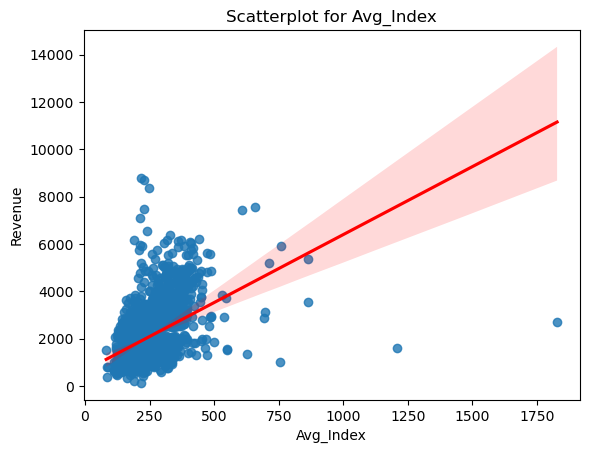

In [32]:
# scatterplot with trendline for "Avg_Index"
sns.regplot(x    = 'Avg_Index',
            y    = 'REVENUE' ,
            data = grocery_df,
            line_kws={"color": "red"})


# titles and axis labels
plt.title(label   = 'Scatterplot for Avg_Index')
plt.xlabel(xlabel = 'Avg_Index')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

In [33]:
## Feature 6 ##
# Create Feature for Customer_Value_Interaction
grocery_df['Customer_Value_Interaction'] = grocery_df['High_Value_Shopper'] * grocery_df['Purchase_Score']

# creating correlation with REVENUE and log_REVENUE                                 
cvi_corr1 = grocery_df.loc[:, 'Customer_Value_Interaction'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
cvi_corr2 = grocery_df.loc[:, 'Customer_Value_Interaction'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)


# printing results of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{cvi_corr1}
log_Revenue:\t{cvi_corr2}
""")


CORRELATION 
-----------
Revenue:	0.302
log_Revenue:	0.339



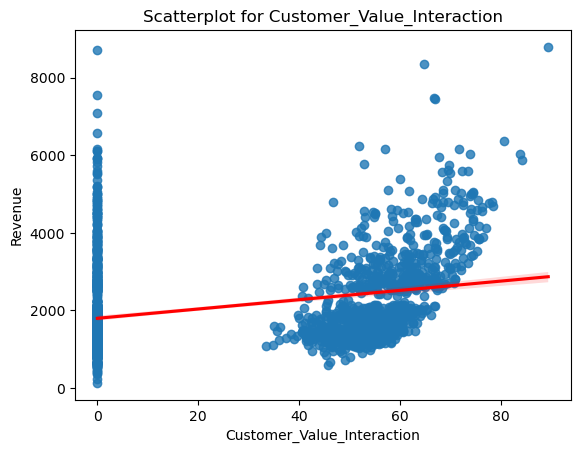

In [34]:
# scatterplot with trendline for "Customer_Value_Interaction"
sns.regplot(x    = 'Customer_Value_Interaction',
            y    = 'REVENUE' ,
            data = grocery_df,
            line_kws={"color": "red"})


# titles and axis labels
plt.title(label   = 'Scatterplot for Customer_Value_Interaction')
plt.xlabel(xlabel = 'Customer_Value_Interaction')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

In [35]:
## Feature 7 ##
#Create Feature for 'Purchase_Time'
grocery_df['Purchase_Time'] = grocery_df['Avg_Time_Per_Visit'] * grocery_df['Total_Products_Ordered']

# creating correlation with REVENUE and log_REVENUE                                 
pur_time_corr1 = grocery_df.loc[:, 'Purchase_Time'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
pur_time_corr2 = grocery_df.loc[:, 'Purchase_Time'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)


# printing results of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{pur_time_corr1}
log_Revenue:\t{pur_time_corr2}
""")


CORRELATION 
-----------
Revenue:	0.76
log_Revenue:	0.69



In [36]:
## Feature 8 ##
#create feature for log_Brand_Loyalty
grocery_df['Brand_Loyalty'] = grocery_df['Total_Products_Ordered'] / grocery_df['Total_Brands_Purchased']

# creating correlation with REVENUE and log_REVENUE                                 
br_loy_corr1 = grocery_df.loc[:, 'Brand_Loyalty'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
br_loy_corr2 = grocery_df.loc[:, 'Brand_Loyalty'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)


# printing results of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{br_loy_corr1}
log_Revenue:\t{br_loy_corr2}
""")


CORRELATION 
-----------
Revenue:	0.305
log_Revenue:	0.296



In [37]:
# checking skewness for features
grocery_df.iloc[:,:].skew(axis = 0).sort_values(ascending=True).round(decimals = 2)

has_Premium                         -1.22
has_Returned                        -0.91
log_Product_Categories_Purchased    -0.66
log_Avg_Clicks_Per_Visit            -0.45
log_Total_Products_Ordered          -0.21
log_Total_Weeks_Premium             -0.18
Avg_Product_Rating                  -0.11
log_Avg_Time_Per_Visit              -0.06
Web_Logins                          -0.04
Cart_Variety_Index                  -0.01
Logins                               0.01
App_Logins                           0.05
Purchase_Score                       0.10
High_Value_Shopper                   0.14
log_Total_Products_Returned          0.14
log_REVENUE                          0.19
Customer_Value_Interaction           0.26
Customer_Service_Inqueries           0.37
log_Total_Product_Interactions       0.46
Engagement_Score                     0.47
log_Total_Brands_Purchased           1.03
has_Late_Deliveries                  1.07
log_Late_Deliveries                  1.20
Avg_Time_Per_Visit                

In [38]:
# create new correlation with all engineered features
grocery_corr_new = grocery_df.corr(method='pearson').round(3)

# Filter correlation to 'REVENUE' and 'log_REVENUE'
grocery_corr_new.loc[ : , ['REVENUE', 'log_REVENUE'] ].round(2).sort_values(by = 'REVENUE',
                                                                            ascending = False)


,REVENUE,log_REVENUE
REVENUE,1.00,0.95
log_REVENUE,0.95,1.00
Purchase_Time,0.76,0.69
Norm_Products_Ordered,0.72,0.68
Total_Products_Ordered,0.72,0.68
Norm_Time,0.64,0.65
Avg_Time_Per_Visit,0.64,0.65
Norm_Engagement_Score,0.64,0.62
log_Avg_Time_Per_Visit,0.63,0.67
log_Total_Products_Ordered,0.62,0.65


<br>

In [114]:
# all x-data
x_all = list(grocery_df.drop(labels  = ['REVENUE', 'log_REVENUE'],
                             axis = 1))

scaler = StandardScaler()
# FITTING and TRANSFORMING
x_scaled = scaler.fit_transform( grocery_df[ x_all ] )
# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)
# labeling columns
x_scaled_df.columns = grocery_df[ x_all ].columns


# original dataset
x_original = list(grocery_df.loc[ : , 'Total_Products_Ordered' : 'Total_Product_Interactions' ])



# best base model 
x_base = ['Total_Products_Ordered',
         'Avg_Time_Per_Visit',
         'Total_Product_Interactions',  
         'Customer_Service_Inqueries',
         'Avg_Product_Rating']
          
    
# combination of existing features
x_combi = ['Total_Products_Ordered',
          'Avg_Time_Per_Visit',
          'Total_Brands_Purchased',
          'log_Product_Categories_Purchased',
          'log_Total_Product_Interactions',  
          'Customer_Service_Inqueries',
          'Avg_Product_Rating',
          'Total_Weeks_Premium',
          'Engagement_Score',
          'Cart_Variety_Index',
          'has_Premium',
          'has_Returned',
          'has_Late_Deliveries',
          'Logins',
          'High_Value_Shopper',
          'Avg_Index',
          'Brand_Loyalty',
          'Customer_Value_Interaction',
          'Purchase_Time'
          ]
        

# best combination of existing features for KNN model type
x_knn = ['Total_Products_Ordered',
         'Avg_Time_Per_Visit',
         'Total_Product_Interactions',  
         'Customer_Service_Inqueries',
         'Avg_Product_Rating',
         'Purchase_Time',
         'Purchase_Score',
         'Norm_Products_Ordered',
         'Norm_Time', 
         'Norm_Clicks', 
         'Norm_Interactions'
         ]


########################
## response variables ##
########################
original_y = 'REVENUE'
log_y      = 'log_REVENUE'


<br>

# OLS Linear Regression	

In [115]:
# preparing x-data for OLS
x_data_OLS = grocery_df[ x_combi ]

# preparing y-data for OLS
y_data_OLS = grocery_df[ original_y ]

# train-test split for OLS
x_train, x_test, y_train, y_test = train_test_split(x_data_OLS, 
                                                    y_data_OLS,
                                                    test_size    = 0.25,
                                                    random_state = 114 )

In [116]:
# naming the model
model_name = "Linear Regression"


# INSTANTIATING model object
model = sklearn.linear_model.LinearRegression()


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(model_train_score - model_test_score, ndigits = 4)


# displaying results
print(f"""
{model_name}

Training Score:  {model_train_score}
Testing Score:   {model_test_score}
Train-Test Gap:  {model_gap}
""")


Linear Regression

Training Score:  0.6921
Testing Score:   0.7179
Train-Test Gap:  -0.0258



<br>

# Lasso Regression

In [110]:
# preparing x-data for Lasso
x_data_Lasso = grocery_df[ x_all ]

# preparing y-data for Lasso
y_data_Lasso = grocery_df[ original_y ]

# train-test split for Lasso
x_train, x_test, y_train, y_test = train_test_split(x_data_Lasso, 
                                                    y_data_Lasso,
                                                    test_size    = 0.25,
                                                    random_state = 114 )

In [111]:
# naming the model
model_name = "Lasso Regression"


# INSTANTIATING model object
model = sklearn.linear_model.Lasso()


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)



# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(model_train_score - model_test_score, ndigits = 4)


# displaying results
print(f"""
{model_name}

Training Score:  {model_train_score}
Testing Score:   {model_test_score}
Train-Test Gap:  {model_gap}
""")


Lasso Regression

Training Score:  0.7001
Testing Score:   0.7008
Train-Test Gap:  -0.0007



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.747e+08, tolerance: 1.823e+05
  model = cd_fast.enet_coordinate_descent(


<br>

# Ridge Regression

In [112]:
# preparing x-data for Ridge
x_data_Ridge = grocery_df[ x_all ]

# preparing y-data for Ridge
y_data_Ridge = grocery_df[ original_y ]

# train-test split for Ridge
x_train, x_test, y_train, y_test = train_test_split(x_data_Ridge, 
                                                    y_data_Ridge,
                                                    test_size    = 0.25,
                                                    random_state = 114 )

In [113]:
# naming the model
model_name = "Ridge Regression"


# INSTANTIATING model object
model = sklearn.linear_model.Ridge()


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)



# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(model_train_score - model_test_score, ndigits = 4)


# displaying results
print(f"""
{model_name}

Training Score:  {model_train_score}
Testing Score:   {model_test_score}
Train-Test Gap:  {model_gap}
""")


Ridge Regression

Training Score:  0.7011
Testing Score:   0.6949
Train-Test Gap:  0.0062



<br>

# Elastic Net Regression

In [46]:
# preparing x-data for EN
x_data_EN = x_scaled_df[ x_all ]


# preparing y-data for EN
y_data_EN = grocery_df[ original_y ]


# train-test split for EN
x_train, x_test, y_train, y_test = train_test_split(x_data_EN, 
                                                    y_data_EN,
                                                    test_size    = 0.25,
                                                    random_state = 114 )

In [47]:
# naming the model
model_name = "Elastic Net Regression"


# INSTANTIATING model object
model = sklearn.linear_model.SGDRegressor(penalty = 'elasticnet',
                                          l1_ratio = 0.15)


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)



# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(model_train_score - model_test_score, ndigits = 4)


# displaying results
print(f"""
{model_name}

Training Score:  {model_train_score}
Testing Score:   {model_test_score}
Train-Test Gap:  {model_gap}
""")


Elastic Net Regression

Training Score:  0.6937
Testing Score:   0.7228
Train-Test Gap:  -0.0291



<br>

# K-Nearest Neighbors

In [48]:
# preparing x-data for KNN
x_data_KNN = x_scaled_df[ x_knn ]

# preparing y-data for KNN
y_data_KNN = grocery_df[ log_y ]

# train-test split for KNN
x_train, x_test, y_train, y_test = train_test_split(x_data_KNN, 
                                                    y_data_KNN,
                                                    test_size    = 0.25,
                                                    random_state = 114 )

In [49]:
## optimal neighbors ##
def opt_neighbors(x_train   = x_train,
                  y_train   = y_train,
                  x_test    = x_test,
                  y_test    = y_test,
                  max_neighbors = 50):
    
    """
    This function visualizes R-Square values for the K-Nearest Neighbors
    algorithm.
    
    
    Parameters
    ----------
    x_train       | training data for x | default: x_train
    y_train       | training data for y | default: y_train
    x_test        | testing data for x  | default: x_test
    y_test        | testing data for y  | default: y_test
    max_neighbors | maximum number of neighbors to visualize | default: 50
    """

    # lists to store metrics
    train_rsq = []
    test_rsq  = []
    tt_gap    = []
    
    
    # creating range object for neighbors
    neighbors = range(max_neighbors)
    
    
    # visualizing results
    for n_neighbors in neighbors:

        # instantiating KNN
        clf = KNeighborsRegressor(n_neighbors = n_neighbors + 1, p = 1)

        # fitting to the data
        clf.fit(x_train, y_train)

        # storing the training set accuracy
        train_rsq.append(clf.score(x_train, y_train))

        # recording the generalization accuracy
        test_rsq.append(clf.score(x_test, y_test))

        # train
        tt_gap.append(abs(clf.score(x_train, y_train) - clf.score(x_test, y_test)))


    # plotting the visualization
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(neighbors, train_rsq, label = "R-Square (Training Set)")
    plt.plot(neighbors, test_rsq,  label = "R-Square (Testing Set)")
    plt.ylabel(ylabel = "Coefficient of Determination")
    plt.xlabel(xlabel = "Number of Neighbors")
    plt.legend()
    plt.show()


    # finding the optimal number of neighbors
    opt_neighbors = tt_gap.index(min(tt_gap)) + 1
    print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [50]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 19)


# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train, y_train)


# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(x_test)


# SCORING the results
knn_opt_score_train = round(knn_opt.score(x_train, y_train), ndigits = 4)
knn_opt_score_test  = round(knn_opt.score(x_test, y_test), ndigits = 4)
knn_opt_test_gap    = round(abs(knn_opt_score_train - knn_opt_score_test), ndigits = 4)


# checking results
print(f"""
K-Nearest Neighbors
-------------------
Training Score: {knn_opt_score_train}
Testing Score : {knn_opt_score_test}
Train-Test Gap: {knn_opt_test_gap}
""")


K-Nearest Neighbors
-------------------
Training Score: 0.7272
Testing Score : 0.7297
Train-Test Gap: 0.0025



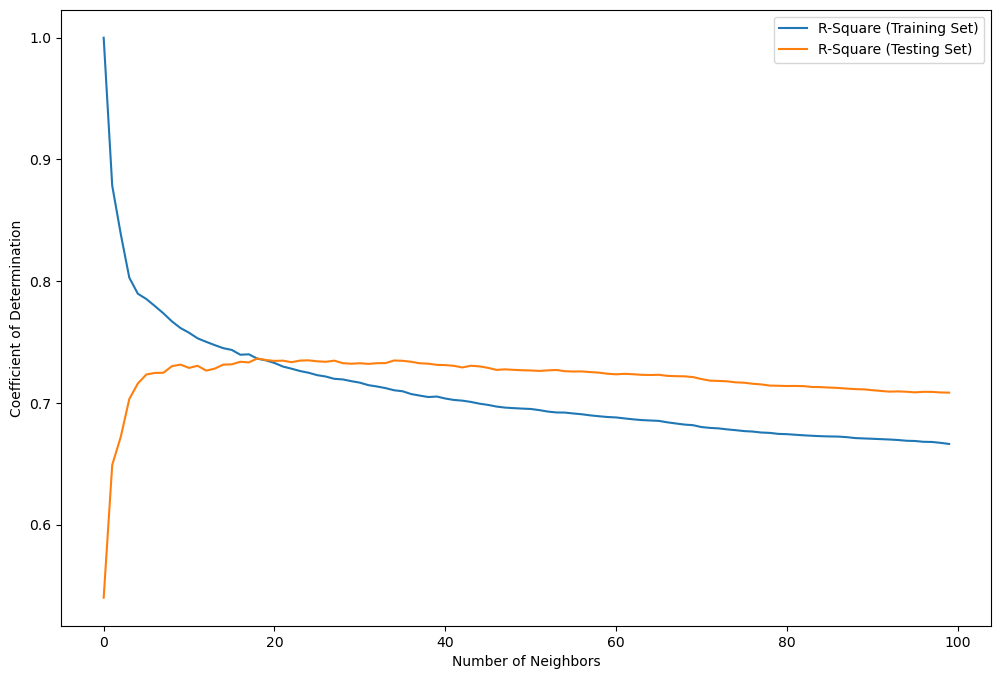

The optimal number of neighbors is 19


In [51]:
# visualizing KNN results
opt_neighbors(x_train   = x_train,
              y_train   = y_train,
              x_test    = x_test,
              y_test    = y_test,
              max_neighbors = 100)